In [2]:
%reload_ext autoreload
import numpy as np
import pygame as pg

from engine3d.renderer import Renderer
from engine3d.geometry.vector import Vector2D


class MyRenderer(Renderer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.SCREEN_WIDTH = args[0]
        self.SCREEN_HEIGHT = args[1]
        self.title = args[2]
        self.fps = args[3]
        self.H_SCREEN_WIDTH = self.SCREEN_WIDTH // 2
        self.H_SCREEN_HEIGHT = self.SCREEN_HEIGHT // 2
        self.center = pg.math.Vector2(self.H_SCREEN_WIDTH, self.H_SCREEN_HEIGHT)
        self.angle = np.pi / 4

    def calc_ray2(self) -> None:
        self.ray = pg.math.Vector2(np.sin(self.angle), np.cos(self.angle)) * 3

    def calc_ray(self) -> None:
        self.ray = pg.math.Vector2(np.sin(self.angle), np.cos(self.angle)) * 3
        self._ray = Vector2D(self.ray.x, -self.ray.y)
        self.norm = Vector2D(0, 1)
        self._refr_ray = self._ray.refract(Vector2D(0, 1), 0.67)
        self.refr_ray = pg.math.Vector2(self._refr_ray.x, -self._refr_ray.y)

    def handle_events(self) -> None:
        
        keys = pg.key.get_pressed()
        if keys[pg.K_a]:
            self.angle += 0.01
            self.angle %= 2 * np.pi
        if keys[pg.K_d]:
            self.angle -= 0.01
            self.angle %= 2 * np.pi

        for event in pg.event.get():
            if event.type == pg.QUIT:
                self.running = False
                pg.quit()

    def draw(self):
        self.screen.fill((0,0,0))
        self.calc_ray()
        # self.calc_ray2()
        pg.draw.line(self.screen, (0,0,255), 
                     pg.math.Vector2(0, self.H_SCREEN_HEIGHT), 
                     pg.math.Vector2(self.SCREEN_WIDTH, self.H_SCREEN_HEIGHT))
        pg.draw.line(self.screen, (0,255,0),
                     self.center,
                     self.center - self.ray * 10)
        pg.draw.line(self.screen, (255,0,0),
                     self.center,
                     self.center + self.refr_ray * 10)


renderer = MyRenderer(720, 480, "My Renderer", 60)
renderer.run()

In [3]:
import numpy as np

# from engine3d.geometry.matrix import Matrix2D

a = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])

print(a.__rmatmul__(b))


[23 34]


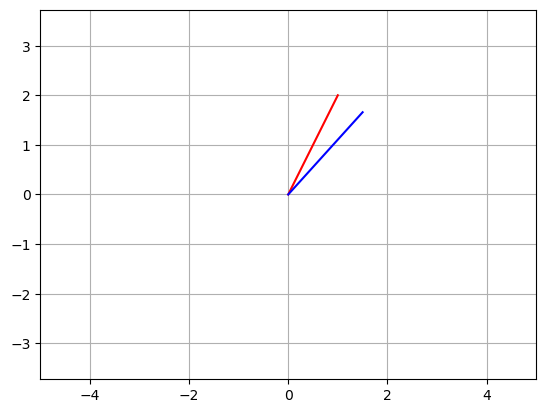

In [4]:
from engine3d.geometry.vector import Vector2D
import matplotlib.pyplot as plt

v1 = Vector2D(1, 2)
v2 = Vector2D(3, 4)
n = Vector2D(0, 1)

v3 = v1.refract(n, 1.5)

def manipulate_v1(v1, angle):
    v1.rotate(angle)
    return v1

# Manipulate the vector on plot

plt.axis('equal')
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.plot([0, v1.x], [0, v1.y], 'r')
plt.plot([0, v3.x], [0, v3.y], 'b')
plt.show()